In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Downloading the data using wget, so that there is no dependency on maintaining the file externally

def load_spam_data():
      global x_test, y_test, x_final_train, y_final_train,x_final_val,y_final_val
      !wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
      #header= None so as to give proper headers
      # using pandas library to read the csv, all '?' to be replaced with NaN  
      df = pd.read_csv('spambase.data', header=None,na_values=['?'])
      print(df.head())

      #Normallizing the databetween 0 and 1 using min-max
      df=(df-df.min())/(df.max()-df.min())
      print(df.head())
      x, y = df.iloc[:, :57].values, df.iloc[:, 57].values
      
      #Splitting the training and testing data as specified in question
      x_train =x[:4000]
      x_test = x[4000:]
      y_train =y[:4000]
      y_test =y[4000:]
      #splitting in training and validation subset
      x_final_train =x_train[:3500]
      x_final_val = x_train[3500:]

      y_final_train=y_train[:3500]
      y_final_val=y_train[3500:]
      
      print(x_final_train.dtype)
      #It is most common to use 32-bit precision when training a neural network,converted to 32 bit floats. Since the dataset fits easily in RAM.
      x_final_train = x_final_train.astype('float32')
      x_test = x_test.astype('float32')
      x_final_val=x_final_val.astype('float32')
      #x_train/=255.0
      #x_test/=255.0
      print('training set',x_final_train.shape)
      print('validation set',x_final_val.shape)
      print('test set',x_test.shape)
      

load_spam_data()

--2021-02-16 22:55:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data.19’

spambase.data.19    100%[===================>] 686.47K  2.49MB/s    in 0.3s    

2021-02-16 22:55:04 (2.49 MB/s) - ‘spambase.data.19’ saved [702942/702942]

     0     1     2    3     4     5   ...     52     53     54   55    56  57
0  0.00  0.64  0.64  0.0  0.32  0.00  ...  0.000  0.000  3.756   61   278   1
1  0.21  0.28  0.50  0.0  0.14  0.28  ...  0.180  0.048  5.114  101  1028   1
2  0.06  0.00  0.71  0.0  1.23  0.19  ...  0.184  0.010  9.821  485  2259   1
3  0.00  0.00  0.00  0.0  0.63  0.00  ...  0.000  0.000  3.537   40   191   1
4  0.00  0.00  0.00  0.0  0.63  0.00  ...  0.000  0.000  3.53

In [ ]:
model= Sequential()
model.add(Dense(units=35,activation='linear',input_shape=(57,)))
#model.add(Dropout(0.5))
#model.add(Dense(units=3))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 35)                2030      
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 36        
Total params: 2,066
Trainable params: 2,066
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=keras.optimizers.Adam(
    learning_rate=0.003,
    #initial_accumulator_value=,
    epsilon=1e-07,
    name="Adam"
)
#uding binary because outcome will be 0 or 1
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=[tf.keras.metrics.BinaryAccuracy()])
#model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["categorical_accuracy"])

TypeError: ignored

In [ ]:
history = model.fit(x_final_train, y_final_train,epochs=40,batch_size=10,validation_data=(x_final_val,y_final_val))

Epoch 1/40
350/350 [==============================] - 1s 3ms/step - loss: 0.1785 - binary_accuracy: 0.9357 - val_loss: 0.1998 - val_binary_accuracy: 0.9500
Epoch 2/40
350/350 [==============================] - 1s 2ms/step - loss: 0.1774 - binary_accuracy: 0.9357 - val_loss: 0.1586 - val_binary_accuracy: 0.9640
Epoch 3/40
350/350 [==============================] - 1s 2ms/step - loss: 0.1751 - binary_accuracy: 0.9394 - val_loss: 0.1885 - val_binary_accuracy: 0.9540
Epoch 4/40
350/350 [==============================] - 1s 2ms/step - loss: 0.1754 - binary_accuracy: 0.9414 - val_loss: 0.1651 - val_binary_accuracy: 0.9560
Epoch 5/40
350/350 [==============================] - 1s 2ms/step - loss: 0.1746 - binary_accuracy: 0.9409 - val_loss: 0.1690 - val_binary_accuracy: 0.9580
Epoch 6/40
350/350 [==============================] - 1s 2ms/step - loss: 0.1739 - binary_accuracy: 0.9400 - val_loss: 0.1407 - val_binary_accuracy: 0.9680
Epoch 7/40
350/350 [==============================] - 1s 2ms/ste

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

19/19 [==============================] - 0s 1ms/step - loss: 2.9157 - binary_accuracy: 0.7770


In [ ]:
model.save('AS1_Problem3.h5')

Text(0.5, 0, 'epoch')

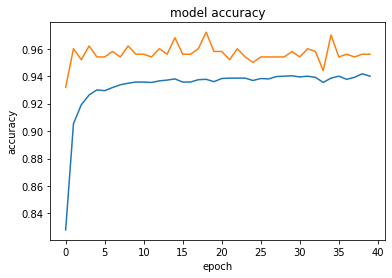

In [ ]:
plt.plot(history.history['binary_accuracy'], label='test accuracy')
plt.plot(history.history['val_binary_accuracy'], label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epochs')

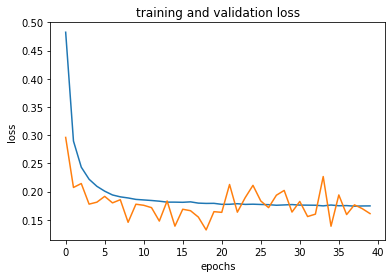

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')